In [409]:
pwd

'C:\\Users\\Nur Aiman\\Downloads'

In [410]:
from time import time
import pandas as pd
import numpy as np
import re
import sys
import csv

In [411]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [412]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to C:\Users\Nur
[nltk_data]     Aiman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nur Aiman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\Nur
[nltk_data]     Aiman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [413]:
import itertools
import datetime

In [414]:
import pprint
import warnings
warnings.filterwarnings('ignore')

In [415]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [416]:
train = pd.read_excel ('Transcription- Audio MDD.xlsx', sheet_name='Training')

In [417]:
train.to_csv ('C:/Users/Nur Aiman/Downloads/train.csv', index = None, header=True)

In [418]:
train = pd.read_csv('C:/Users/Nur Aiman/Downloads/train.csv', header=0, lineterminator='\n')
train = train.applymap(lambda x: x.strip() if isinstance(x, str) else x)

nRow, nCol = train.shape
print(f'There are {nRow} rows and {nCol} columns in the training set')

# Removing empty rows from csv 
train.dropna(axis=0, how='all',inplace=True)
nRow, nCol = train.shape
print(f'There are {nRow} rows and {nCol} columns in the training set after removing empty rows')

train.head()

There are 83 rows and 3 columns in the training set
There are 83 rows and 3 columns in the training set after removing empty rows


,ID,speech,is_depressed\r
0,006q1,Perasaan saya tiga hari ni rasa macam penat ra...,1
1,110q1,Sejujurnya saya berasa diri saya kosong saya t...,1
2,113q1,assalamualaikum saya 113. 3 hari lepas eh sepa...,1
3,136q1,Bismillahiroh Manirrohim Assalamualaikum wbt k...,1
4,139q1,Perasaan saya 3 hari ni saya malas nak buat ap...,1


In [419]:
test = pd.read_excel ('Transcription- Audio MDD.xlsx', sheet_name='Test')
test.to_csv ('C:/Users/Nur Aiman/Downloads/test.csv', index = None, header=True)

In [420]:
test = pd.read_csv('C:/Users/Nur Aiman/Downloads/test.csv', header=0, lineterminator='\n')
test = test.applymap(lambda x: x.strip() if isinstance(x, str) else x)

nRow, nCol = test.shape
print(f'There are {nRow} rows and {nCol} columns in the testing set')

# Removing empty rows from csv 
test.dropna(axis=0, how='all',inplace=True)
nRow, nCol = test.shape
print(f'There are {nRow} rows and {nCol} columns in the testing set after removing empty rows')

test.head()

There are 21 rows and 2 columns in the testing set
There are 21 rows and 2 columns in the testing set after removing empty rows


,ID,speech\r
0,212q,Okay apa yang bermain dalam fikiran saya sejak...
1,219q,Hari isnin lepas saya pergi ke hospital dan sa...
2,MH007Q,"Dalam 3 hari yang lepas, saya banyak meluangk..."
3,MH008Q,"Dalam 3 hari lepas ni, saya banyak berada di r..."
4,RokuraQ,Apa yang saya rasa sepanjang 3 hari yang lepas...


In [421]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 82
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             83 non-null     object
 1   speech         83 non-null     object
  83 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.6+ KB


In [422]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       21 non-null     object
  21 non-null     object
dtypes: object(2)
memory usage: 504.0+ bytes


In [423]:
train.isnull().sum()

ID                0
speech            0
is_depressed\r    0
dtype: int64

## Pre-Processing Steps: 
These are the same from previous sessions:

1. Expand contractions
2. Noise cleaning
3. Remove stopwords

In [424]:
# Contraction Mapping

!pip install contractions
import contractions

### Expand contractions

In [425]:
train['speech'] = train['speech'].apply(lambda x: [contractions.fix(word) for word in x.split(' ')])

In [426]:
train.head()

,ID,speech,is_depressed\r
0,006q1,"[Perasaan, saya, tiga, hari, ni, rasa, macam, ...",1
1,110q1,"[Sejujurnya, saya, berasa, diri, saya, kosong,...",1
2,113q1,"[assalamualaikum, saya, 113., 3, hari, lepas, ...",1
3,136q1,"[Bismillahiroh, Manirrohim, Assalamualaikum, w...",1
4,139q1,"[Perasaan, saya, 3, hari, ni, saya, malas, nak...",1


In [427]:
train['is_depressed'] = train['is_depressed\r']
train.drop(['is_depressed\r'], axis=1, inplace = True)
train.head()

,ID,speech,is_depressed
0,006q1,"[Perasaan, saya, tiga, hari, ni, rasa, macam, ...",1
1,110q1,"[Sejujurnya, saya, berasa, diri, saya, kosong,...",1
2,113q1,"[assalamualaikum, saya, 113., 3, hari, lepas, ...",1
3,136q1,"[Bismillahiroh, Manirrohim, Assalamualaikum, w...",1
4,139q1,"[Perasaan, saya, 3, hari, ni, saya, malas, nak...",1


In [428]:
test['speech'] = test['speech\r']
test.drop(['speech\r'], axis=1, inplace = True)
test.head()

,ID,speech
0,212q,Okay apa yang bermain dalam fikiran saya sejak...
1,219q,Hari isnin lepas saya pergi ke hospital dan sa...
2,MH007Q,"Dalam 3 hari yang lepas, saya banyak meluangk..."
3,MH008Q,"Dalam 3 hari lepas ni, saya banyak berada di r..."
4,RokuraQ,Apa yang saya rasa sepanjang 3 hari yang lepas...


In [429]:
test['speech'] = test['speech'].apply(lambda x: [contractions.fix(word) for word in x.split(' ')])
test.head()

,ID,speech
0,212q,"[Okay, apa, yang, bermain, dalam, fikiran, say..."
1,219q,"[Hari, isnin, lepas, saya, pergi, ke, hospital..."
2,MH007Q,"[Dalam, 3, hari, yang, lepas,, , saya, banyak,..."
3,MH008Q,"[Dalam, 3, hari, lepas, ni,, saya, banyak, ber..."
4,RokuraQ,"[Apa, yang, saya, rasa, sepanjang, 3, hari, ya..."


In [430]:
#joining back the list of items into one string
train['speech'] = [' '.join(map(str, l)) for l in train['speech']]
test['speech'] = [' '.join(map(str, l)) for l in test['speech']]

train.head()

,ID,speech,is_depressed
0,006q1,Perasaan saya tiga hari ni rasa macam penat ra...,1
1,110q1,Sejujurnya saya berasa diri saya kosong saya t...,1
2,113q1,assalamualaikum saya 113. 3 hari lepas eh sepa...,1
3,136q1,Bismillahiroh Manirrohim Assalamualaikum wbt k...,1
4,139q1,Perasaan saya 3 hari ni saya malas nak buat ap...,1


In [431]:
test.head()

,ID,speech
0,212q,Okay apa yang bermain dalam fikiran saya sejak...
1,219q,Hari isnin lepas saya pergi ke hospital dan sa...
2,MH007Q,"Dalam 3 hari yang lepas, saya banyak meluangk..."
3,MH008Q,"Dalam 3 hari lepas ni, saya banyak berada di r..."
4,RokuraQ,Apa yang saya rasa sepanjang 3 hari yang lepas...


### Noise Cleaning 

In [432]:
import regex as re

train['speech'] = train['speech'].str.lower()
train['speech'] = train['speech'].apply(lambda x: re.sub('[^\w\d\s\']+', '', x))
train['speech'] = train['speech'].apply(lambda x: re.sub('\w*\d\w*', '', x))


train.head()

,ID,speech,is_depressed
0,006q1,perasaan saya tiga hari ni rasa macam penat ra...,1
1,110q1,sejujurnya saya berasa diri saya kosong saya t...,1
2,113q1,assalamualaikum saya hari lepas eh sepanjang...,1
3,136q1,bismillahiroh manirrohim assalamualaikum wbt k...,1
4,139q1,perasaan saya hari ni saya malas nak buat apa...,1


In [433]:
test['speech'] = test['speech'].str.lower()
test['speech'] = test['speech'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))
test['speech'] = test['speech'].apply(lambda x: re.sub('\w*\d\w*', '', x))


test.head()

,ID,speech
0,212q,okay apa yang bermain dalam fikiran saya sejak...
1,219q,hari isnin lepas saya pergi ke hospital dan sa...
2,MH007Q,dalam hari yang lepas saya banyak meluangkan...
3,MH008Q,dalam hari lepas ni saya banyak berada di rum...
4,RokuraQ,apa yang saya rasa sepanjang hari yang lepas ...


Regex explanation:

1. [^] matches everything but everything inside the blockquotes
2. \w matches any word character (equal to [a-zA-Z0-9_])
3. \d matches a digit (equal to [0-9])
4. \s matches any whitespace character (equal to [\r\n\t\f\v ])
5. \' matches the character ' literally (case sensitive)
6. '+' matches between one and unlimited times, as many times as possible, giving back as needed

In [434]:
#nltk tokenization

train['speech_tokenize'] = train['speech'].apply(word_tokenize)
test['speech_tokenize'] = test['speech'].apply(word_tokenize)

train.head()

,ID,speech,is_depressed,speech_tokenize
0,006q1,perasaan saya tiga hari ni rasa macam penat ra...,1,"[perasaan, saya, tiga, hari, ni, rasa, macam, ..."
1,110q1,sejujurnya saya berasa diri saya kosong saya t...,1,"[sejujurnya, saya, berasa, diri, saya, kosong,..."
2,113q1,assalamualaikum saya hari lepas eh sepanjang...,1,"[assalamualaikum, saya, hari, lepas, eh, sepan..."
3,136q1,bismillahiroh manirrohim assalamualaikum wbt k...,1,"[bismillahiroh, manirrohim, assalamualaikum, w..."
4,139q1,perasaan saya hari ni saya malas nak buat apa...,1,"[perasaan, saya, hari, ni, saya, malas, nak, b..."


In [435]:
test.head()

,ID,speech,speech_tokenize
0,212q,okay apa yang bermain dalam fikiran saya sejak...,"[okay, apa, yang, bermain, dalam, fikiran, say..."
1,219q,hari isnin lepas saya pergi ke hospital dan sa...,"[hari, isnin, lepas, saya, pergi, ke, hospital..."
2,MH007Q,dalam hari yang lepas saya banyak meluangkan...,"[dalam, hari, yang, lepas, saya, banyak, melua..."
3,MH008Q,dalam hari lepas ni saya banyak berada di rum...,"[dalam, hari, lepas, ni, saya, banyak, berada,..."
4,RokuraQ,apa yang saya rasa sepanjang hari yang lepas ...,"[apa, yang, saya, rasa, sepanjang, hari, yang,..."


In [436]:
# initializing Stop words libraries

#nltk.download('stopwords')
#from nltk.corpus import stopwords
#stop_words = set(stopwords.words('english'))
stop_words = {'abdul',
 'abdullah',
 'acara',
 'ada',
 'adalah',
 'ahmad',
 'air',
 'akan',
 'akhbar',
 'akhir',
 'aktiviti',
 'alam',
 'amat',
 'amerika',
 'anak',
 'anggota',
 'antara',
 'antarabangsa',
 'apa',
 'apabila',
 'april',
 'as',
 'asas',
 'asean',
 'asia',
 'asing',
 'atas',
 'atau',
 'australia',
 'awal',
 'awam',
 'bagaimanapun',
 'bagi',
 'bahagian',
 'bahan',
 'baharu',
 'bahawa',
 'baik',
 'bandar',
 'bank',
 'banyak',
 'barangan',
 'baru',
 'baru-baru',
 'bawah',
 'beberapa',
 'bekas',
 'beliau',
 'belum',
 'berada',
 'berakhir',
 'berbanding',
 'berdasarkan',
 'berharap',
 'berikutan',
 'berjaya',
 'berjumlah',
 'berkaitan',
 'berkata',
 'berkenaan',
 'berlaku',
 'bermula',
 'bernama',
 'bernilai',
 'bersama',
 'berubah',
 'besar',
 'bhd',
 'bidang',
 'bilion',
 'bn',
 'boleh',
 'bukan',
 'bulan',
 'bursa',
 'cadangan',
 'china',
 'dagangan',
 'dalam',
 'dan',
 'dana',
 'dapat',
 'dari',
 'daripada',
 'dasar',
 'datang',
 'datuk',
 'demikian',
 'dengan',
 'depan',
 'derivatives',
 'dewan',
 'di',
 'diadakan',
 'dibuka',
 'dicatatkan',
 'dijangka',
 'diniagakan',
 'dis',
 'disember',
 'ditutup',
 'dolar',
 'dr',
 'dua',
 'dunia',
 'ekonomi',
 'eksekutif',
 'eksport',
 'empat',
 'enam',
 'faedah',
 'feb',
 'global',
 'hadapan',
 'hanya',
 'harga',
 'hari',
 'hasil',
 'hingga',
 'hubungan',
 'ia',
 'iaitu',
 'ialah',
 'indeks',
 'india',
 'indonesia',
 'industri',
 'ini',
 'islam',
 'isnin',
 'isu',
 'itu',
 'jabatan',
 'jalan',
 'jan',
 'jawatan',
 'jawatankuasa',
 'jepun',
 'jika',
 'jualan',
 'juga',
 'julai',
 'jumaat',
 'jumlah',
 'jun',
 'juta',
 'kadar',
 'kalangan',
 'kali',
 'kami',
 'kata',
 'katanya',
 'kaunter',
 'kawasan',
 'ke',
 'keadaan',
 'kecil',
 'kedua',
 'kedua-dua',
 'kedudukan',
 'kekal',
 'kementerian',
 'kemudahan',
 'kenaikan',
 'kenyataan',
 'kepada',
 'kepentingan',
 'keputusan',
 'kerajaan',
 'kerana',
 'kereta',
 'kerja',
 'kerjasama',
 'kes',
 'keselamatan',
 'keseluruhan',
 'kesihatan',
 'ketika',
 'ketua',
 'keuntungan',
 'kewangan',
 'khamis',
 'kini',
 'kira-kira',
 'kita',
 'klci',
 'klibor',
 'komposit',
 'kontrak',
 'kos',
 'kuala',
 'kuasa',
 'kukuh',
 'kumpulan',
 'lagi',
 'lain',
 'langkah',
 'laporan',
 'lebih',
 'lepas',
 'lima',
 'lot',
 'luar',
 'lumpur',
 'mac',
 'mahkamah',
 'mahu',
 'majlis',
 'makanan',
 'maklumat',
 'malam',
 'malaysia',
 'mana',
 'manakala',
 'masa',
 'masalah',
 'masih',
 'masing-masing',
 'masyarakat',
 'mata',
 'media',
 'mei',
 'melalui',
 'melihat',
 'memandangkan',
 'memastikan',
 'membantu',
 'membawa',
 'memberi',
 'memberikan',
 'membolehkan',
 'membuat',
 'mempunyai',
 'menambah',
 'menarik',
 'menawarkan',
 'mencapai',
 'mencatatkan',
 'mendapat',
 'mendapatkan',
 'menerima',
 'menerusi',
 'mengadakan',
 'mengambil',
 'mengenai',
 'menggalakkan',
 'menggunakan',
 'mengikut',
 'mengumumkan',
 'mengurangkan',
 'meningkat',
 'meningkatkan',
 'menjadi',
 'menjelang',
 'menokok',
 'menteri',
 'menunjukkan',
 'menurut',
 'menyaksikan',
 'menyediakan',
 'mereka',
 'merosot',
 'merupakan',
 'mesyuarat',
 'minat',
 'minggu',
 'minyak',
 'modal',
 'mohd',
 'mudah',
 'mungkin',
 'naik',
 'najib',
 'nasional',
 'negara',
 'negara-negara',
 'negeri',
 'niaga',
 'nilai',
 'nov',
 'ogos',
 'okt',
 'oleh',
 'operasi',
 'orang',
 'pada',
 'pagi',
 'paling',
 'pameran',
 'papan',
 'para',
 'paras',
 'parlimen',
 'parti',
 'pasaran',
 'pasukan',
 'pegawai',
 'pejabat',
 'pekerja',
 'pelabur',
 'pelaburan',
 'pelancongan',
 'pelanggan',
 'pelbagai',
 'peluang',
 'pembangunan',
 'pemberita',
 'pembinaan',
 'pemimpin',
 'pendapatan',
 'pendidikan',
 'penduduk',
 'penerbangan',
 'pengarah',
 'pengeluaran',
 'pengerusi',
 'pengguna',
 'pengurusan',
 'peniaga',
 'peningkatan',
 'penting',
 'peratus',
 'perdagangan',
 'perdana',
 'peringkat',
 'perjanjian',
 'perkara',
 'perkhidmatan',
 'perladangan',
 'perlu',
 'permintaan',
 'perniagaan',
 'persekutuan',
 'persidangan',
 'pertama',
 'pertubuhan',
 'pertumbuhan',
 'perusahaan',
 'peserta',
 'petang',
 'pihak',
 'pilihan',
 'pinjaman',
 'polis',
 'politik',
 'presiden',
 'prestasi',
 'produk',
 'program',
 'projek',
 'proses',
 'proton',
 'pukul',
 'pula',
 'pusat',
 'rabu',
 'rakan',
 'rakyat',
 'ramai',
 'rantau',
 'raya',
 'rendah',
 'ringgit',
 'rumah',
 'sabah',
 'sahaja',
 'saham',
 'sama',
 'sarawak',
 'satu',
 'sawit',
 'saya',
 'sdn',
 'sebagai',
 'sebahagian',
 'sebanyak',
 'sebarang',
 'sebelum',
 'sebelumnya',
 'sebuah',
 'secara',
 'sedang',
 'segi',
 'sehingga',
 'sejak',
 'sekarang',
 'sektor',
 'sekuriti',
 'selain',
 'selama',
 'selasa',
 'selatan',
 'selepas',
 'seluruh',
 'semakin',
 'semalam',
 'semasa',
 'sementara',
 'semua',
 'semula',
 'sen',
 'sendiri',
 'seorang',
 'sepanjang',
 'seperti',
 'sept',
 'september',
 'serantau',
 'seri',
 'serta',
 'sesi',
 'setiap',
 'setiausaha',
 'sidang',
 'singapura',
 'sini',
 'sistem',
 'sokongan',
 'sri',
 'sudah',
 'sukan',
 'suku',
 'sumber',
 'supaya',
 'susut',
 'syarikat',
 'syed',
 'tahap',
 'tahun',
 'tan',
 'tanah',
 'tanpa',
 'tawaran',
 'teknologi',
 'telah',
 'tempat',
 'tempatan',
 'tempoh',
 'tenaga',
 'tengah',
 'tentang',
 'terbaik',
 'terbang',
 'terbesar',
 'terbuka',
 'terdapat',
 'terhadap',
 'termasuk',
 'tersebut',
 'terus',
 'tetapi',
 'thailand',
 'tiada',
 'tidak',
 'tiga',
 'timbalan',
 'timur',
 'tindakan',
 'tinggi',
 'tun',
 'tunai',
 'turun',
 'turut',
 'umno',
 'unit',
 'untuk',
 'untung',
 'urus',
 'usaha',
 'utama',
 'walaupun',
 'wang',
 'wanita',
 'wilayah',
 'yang',"buat","kadang","boleh","dalam","jadi","jangan",
                                 "akan","dia","then","banyak","apa","okay","di","dah","je",
                                 "so","haa","dengan","tak","pun","nak","lah","kan","and","kat",
                                 "lah","to","ynag","yang","ada","ya","saya","hmm","ah","tu","macam","dan",
                                 "kami","kalau","dari","lagi","kerana","itu","ini","ke","snagat","sangat",
                                 "pasal","tetapi","apabila","ni","itu","seperti","erm","bagi","contoh","if",
                                 "ermm","tapi","ha","sebab","bila","that","rasa","my","of","i","from","ahh", "agak","aku","the",
                                "benda","memang","still","for","assalamualaikum","insyaAllah","insyaallah","nama", "eh"}

In [437]:
stop_words

{'abdul',
 'abdullah',
 'acara',
 'ada',
 'adalah',
 'agak',
 'ah',
 'ahh',
 'ahmad',
 'air',
 'akan',
 'akhbar',
 'akhir',
 'aktiviti',
 'aku',
 'alam',
 'amat',
 'amerika',
 'anak',
 'and',
 'anggota',
 'antara',
 'antarabangsa',
 'apa',
 'apabila',
 'april',
 'as',
 'asas',
 'asean',
 'asia',
 'asing',
 'assalamualaikum',
 'atas',
 'atau',
 'australia',
 'awal',
 'awam',
 'bagaimanapun',
 'bagi',
 'bahagian',
 'bahan',
 'baharu',
 'bahawa',
 'baik',
 'bandar',
 'bank',
 'banyak',
 'barangan',
 'baru',
 'baru-baru',
 'bawah',
 'beberapa',
 'bekas',
 'beliau',
 'belum',
 'benda',
 'berada',
 'berakhir',
 'berbanding',
 'berdasarkan',
 'berharap',
 'berikutan',
 'berjaya',
 'berjumlah',
 'berkaitan',
 'berkata',
 'berkenaan',
 'berlaku',
 'bermula',
 'bernama',
 'bernilai',
 'bersama',
 'berubah',
 'besar',
 'bhd',
 'bidang',
 'bila',
 'bilion',
 'bn',
 'boleh',
 'buat',
 'bukan',
 'bulan',
 'bursa',
 'cadangan',
 'china',
 'contoh',
 'dagangan',
 'dah',
 'dalam',
 'dan',
 'dana',
 'da

In [438]:
# Before removing checking occurances of stopwords in article content

%matplotlib inline
from matplotlib import pyplot as plt

def plot_top_stopwords_barchart(text):
    stop=stop_words
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

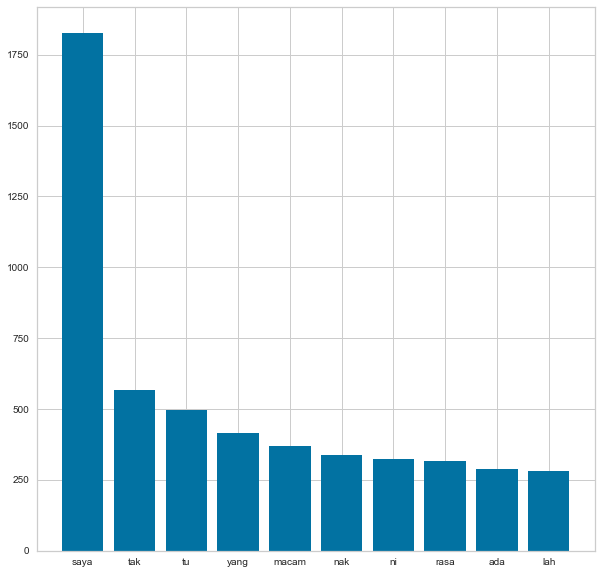

In [439]:
plot_top_stopwords_barchart(train['speech'])

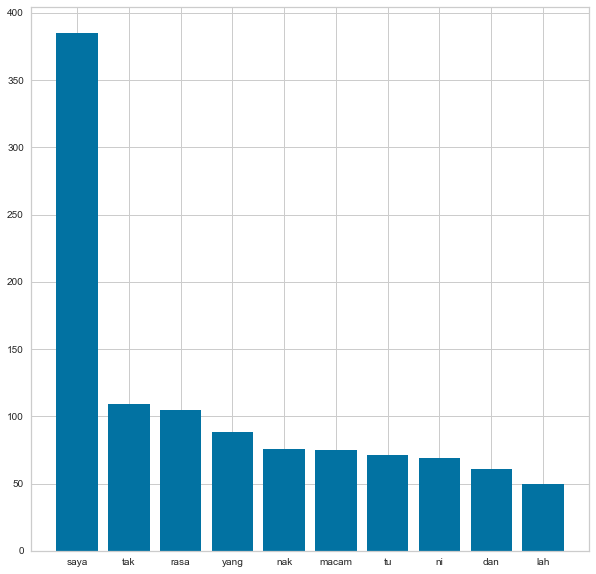

In [440]:
plot_top_stopwords_barchart(test['speech'])

In [441]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=stop_words
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

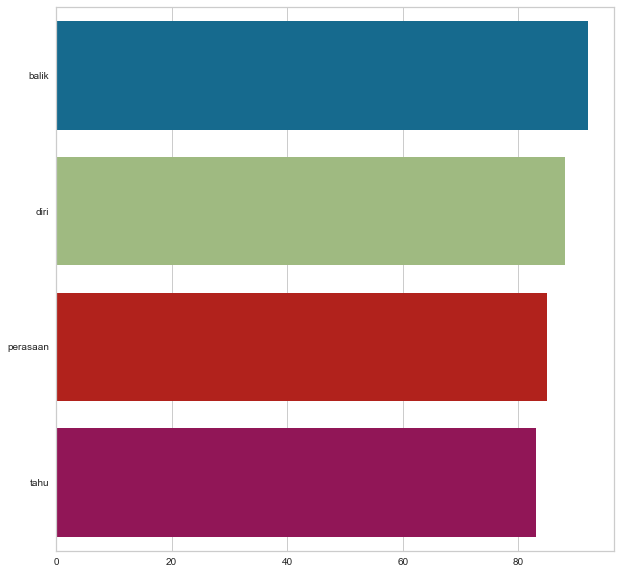

In [442]:
plot_top_non_stopwords_barchart(train['speech'])

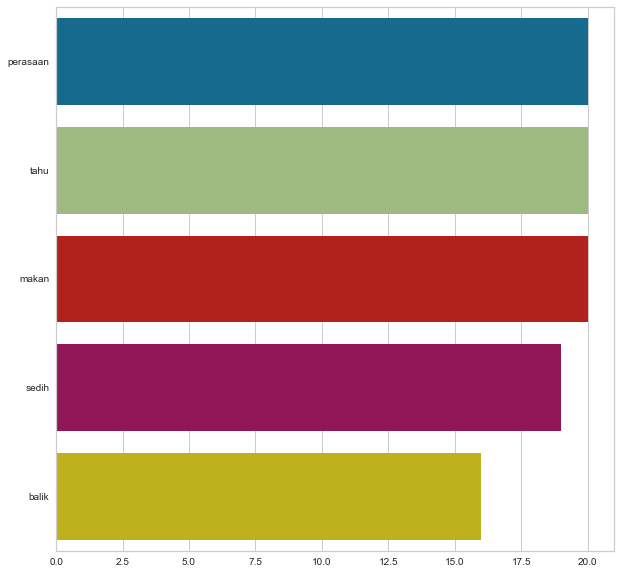

In [443]:
plot_top_non_stopwords_barchart(test['speech'])

### Remove Stopwords

In [444]:
# Now we remove stopwords 

train['speech_tokenize'] = train['speech_tokenize'].apply(lambda x: [word for word in x if word not in stop_words])
train['speech_tokenize_join'] = [' '.join(map(str, l)) for l in train['speech_tokenize']]

train.head()

,ID,speech,is_depressed,speech_tokenize,speech_tokenize_join
0,006q1,perasaan saya tiga hari ni rasa macam penat ra...,1,"[perasaan, penat, lethargic, hopeless, helples...",perasaan penat lethargic hopeless helpless hap...
1,110q1,sejujurnya saya berasa diri saya kosong saya t...,1,"[sejujurnya, berasa, diri, kosong, hala, tuju,...",sejujurnya berasa diri kosong hala tuju nampak...
2,113q1,assalamualaikum saya hari lepas eh sepanjang...,1,"[sampai, saat, tahu, mula, manabanyak, fikir, ...",sampai saat tahu mula manabanyak fikir fikir f...
3,136q1,bismillahiroh manirrohim assalamualaikum wbt k...,1,"[bismillahiroh, manirrohim, wbt, kod, mula, be...",bismillahiroh manirrohim wbt kod mula bekerja ...
4,139q1,perasaan saya hari ni saya malas nak buat apa...,1,"[perasaan, malas, apaapa, hampir, sorrysorry, ...",perasaan malas apaapa hampir sorrysorry pkp cu...


In [445]:
test['speech_tokenize'] = test['speech_tokenize'].apply(lambda x: [word for word in x if word not in stop_words])
test['speech_tokenize_join'] = [' '.join(map(str, l)) for l in test['speech_tokenize']]

test.head()

,ID,speech,speech_tokenize,speech_tokenize_join
0,212q,okay apa yang bermain dalam fikiran saya sejak...,"[bermain, fikiran, sedih, bukannya, sedih, sed...",bermain fikiran sedih bukannya sedih sedih per...
1,219q,hari isnin lepas saya pergi ke hospital dan sa...,"[pergi, hospital, dimasukkan, wad, mengalami, ...",pergi hospital dimasukkan wad mengalami absces...
2,MH007Q,dalam hari yang lepas saya banyak meluangkan...,"[meluangkan, sekitar, sekolah, sekolah, jam, p...",meluangkan sekitar sekolah sekolah jam ptg dim...
3,MH008Q,dalam hari lepas ni saya banyak berada di rum...,"[menghadap, telefon, bimbit, kelas, online, ma...",menghadap telefon bimbit kelas online main gam...
4,RokuraQ,apa yang saya rasa sepanjang hari yang lepas ...,"[seronok, kampus, uia, kawankawan, semuanya, p...",seronok kampus uia kawankawan semuanya pengala...


In [446]:
# Let's evaluate the POS tags for our train set data
tagged_stanzas_train = []
tagged_train = []

for word in train['speech_tokenize']:
  tagged_word = nltk.pos_tag(word)
  tagged_stanzas_train.append(tagged_word)

# This format is needed for below visualizer as in takes only two values. If you skip this format, it might give you - "too many values to unpack error" 
tagged_train.append(tagged_stanzas_train)

In [447]:
# Let's evaluate the POS tags for our test set data
tagged_stanzas_test = []
tagged_test = []

for word in test['speech_tokenize']:
  tagged_word = nltk.pos_tag(word)
  tagged_stanzas_test.append(tagged_word)

# This format is needed for below visualizer as in takes only two values. If you skip this format, it might give you - "too many values to unpack error" 
tagged_test.append(tagged_stanzas_test)

### Yellow Brick: POS Visualizer 

In [448]:
# Yellow Brick is a POS visualizer - https://github.com/DistrictDataLabs/yellowbrick/blob/master/docs/api/text/postag.rst
# You may need to reload the workbook to activate it. In that case, re-run all cells again from the beginning 

!pip install -U yellowbrick

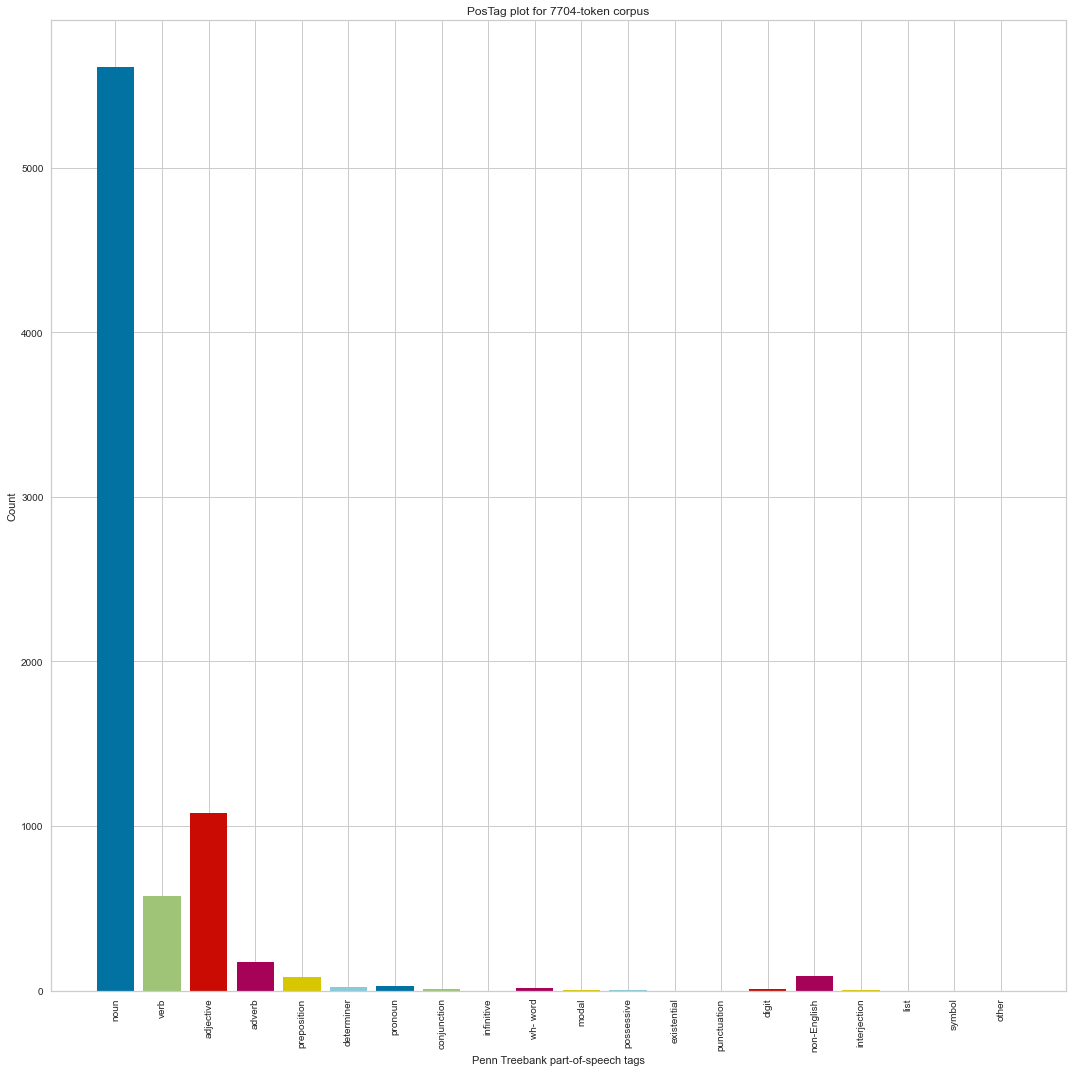

<AxesSubplot:title={'center':'PosTag plot for 7704-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

In [449]:
# Create the visualizer for train test

from yellowbrick.text import PosTagVisualizer
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged_train)
viz.show()

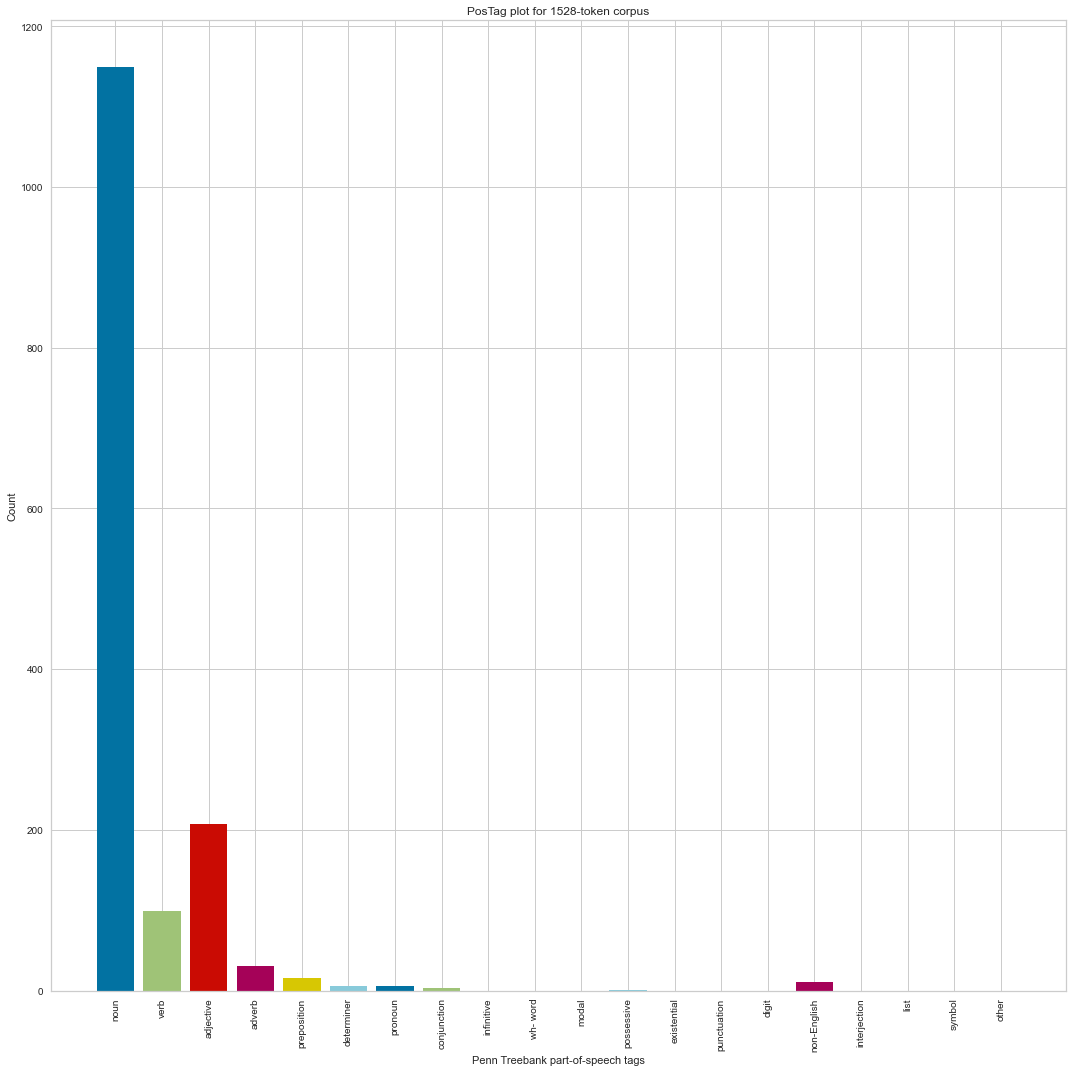

<AxesSubplot:title={'center':'PosTag plot for 1528-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

In [450]:
# Create the visualizer for test test

from yellowbrick.text import PosTagVisualizer
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged_test)
viz.show()

## Text Classification Methodology 

In [451]:
# Now let's check if number of examples for fake vs not-fake label is equal or not. Seems like in this case it's very balanced. 

train["is_depressed"].value_counts()

0    42
1    41
Name: is_depressed, dtype: int64

<AxesSubplot:xlabel='is_depressed', ylabel='count'>

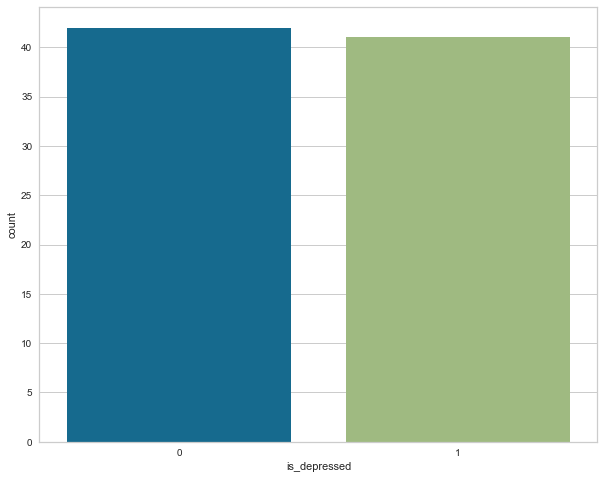

In [452]:
# we see there is an equal number of distribution of target features

rcParams["figure.figsize"] = 10,8
sns.countplot(x = train["is_depressed"])

In [453]:
# lets extract the label column from train dataframe to be the target 'y' variable
targets = train['is_depressed'].values

# Drop the 'label' column from train dataset
train.drop("is_depressed", axis=1, inplace = True)
train.head()

,ID,speech,speech_tokenize,speech_tokenize_join
0,006q1,perasaan saya tiga hari ni rasa macam penat ra...,"[perasaan, penat, lethargic, hopeless, helples...",perasaan penat lethargic hopeless helpless hap...
1,110q1,sejujurnya saya berasa diri saya kosong saya t...,"[sejujurnya, berasa, diri, kosong, hala, tuju,...",sejujurnya berasa diri kosong hala tuju nampak...
2,113q1,assalamualaikum saya hari lepas eh sepanjang...,"[sampai, saat, tahu, mula, manabanyak, fikir, ...",sampai saat tahu mula manabanyak fikir fikir f...
3,136q1,bismillahiroh manirrohim assalamualaikum wbt k...,"[bismillahiroh, manirrohim, wbt, kod, mula, be...",bismillahiroh manirrohim wbt kod mula bekerja ...
4,139q1,perasaan saya hari ni saya malas nak buat apa...,"[perasaan, malas, apaapa, hampir, sorrysorry, ...",perasaan malas apaapa hampir sorrysorry pkp cu...


## TF-IDF 

In [454]:
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))

In [455]:
# fit train data to the count vectorizer
train_counts = count_vectorizer.fit_transform(train['speech'].values)

#fit the ngrams count to the tfidf transformers
train_tfidf = transformer.fit_transform(train_counts)

In [456]:
from sklearn.model_selection import train_test_split

#  If train-test size is not initialized, test_size will be set to 0.25 and train_set = 1-test_size

X_train, X_test, y_train, y_test = train_test_split(train_tfidf, targets, random_state=0)

In [457]:
Extr = ExtraTreesClassifier(n_estimators=5,n_jobs=4)
Extr.fit(X_train, y_train)

print('Accuracy of ExtraTrees classifier on train set: {:.2f}'.format(Extr.score(X_train, y_train)))

print('Accuracy of ExtraTrees classifier on test set: {:.2f}'.format(Extr.score(X_test, y_test)))

Accuracy of ExtraTrees classifier on train set: 1.00
Accuracy of ExtraTrees classifier on test set: 0.67


In [458]:
Adab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=5)
Adab.fit(X_train, y_train)

print('Accuracy of Adaboost classifier on training set: {:.2f}'.format(Adab.score(X_train, y_train)))

print('Accuracy of Adaboost classifier on test set: {:.2f}'.format(Adab.score(X_test, y_test)))

Accuracy of Adaboost classifier on training set: 1.00
Accuracy of Adaboost classifier on test set: 0.67


In [459]:
RandomFC= RandomForestClassifier(n_estimators=5)
RandomFC.fit(X_train, y_train)

print('Accuracy of randomforest classifier on training set: {:.2f}'.format(RandomFC.score(X_train, y_train)))

print('Accuracy of randomforest classifier on test set: {:.2f}'.format(RandomFC.score(X_test, y_test)))

Accuracy of randomforest classifier on training set: 0.97
Accuracy of randomforest classifier on test set: 0.62


In [460]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)

print('Accuracy of NB  classifier on training set: {:.2f}'.format(NB.score(X_train, y_train)))

print('Accuracy of NB classifier on test set: {:.2f}'.format(NB.score(X_test, y_test)))

Accuracy of NB  classifier on training set: 1.00
Accuracy of NB classifier on test set: 0.67


In [461]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

print('Accuracy of Logreg classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))

print('Accuracy of Logreg classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logreg classifier on training set: 1.00
Accuracy of Logreg classifier on test set: 0.62


In [462]:
# Use score method to get accuracy of model
score = logreg.score(X_test, y_test)
print(score)

0.6190476190476191


In [463]:
# Predict and calculate accuracy
from sklearn.metrics import accuracy_score

predictions = logreg.predict(X_test)
score=accuracy_score(y_test,predictions)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 61.9%


In [464]:
from sklearn import metrics

CM = metrics.confusion_matrix(y_test, predictions)
print(CM)

[[5 6]
 [2 8]]


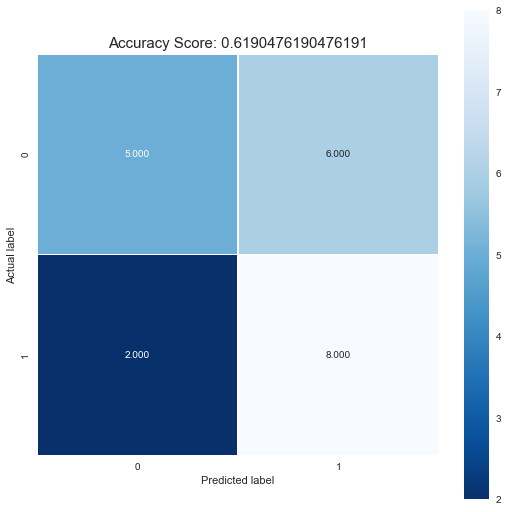

In [465]:
plt.figure(figsize=(9,9))
sns.heatmap(CM, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [468]:
logreg.fit(train_counts, targets)

test_counts = count_vectorizer.transform(test['speech'].values)
test_pred = logreg.predict(test_counts)

pred=pd.DataFrame(test_pred, columns=['test_label'])
pred['ID']=test['ID']
pred.groupby('test_label').count()

,ID
test_label,
0,13
1,8
